## Import Libraries

In [1]:
import os
import git
import math
import shutil
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('../')

from copy_files import copy_files
from generate_images import generate_images

## Data Augmentation

In [3]:
img_dir = os.path.abspath('../../datasets/ISIC-2016/image-data-generator').replace(os.sep, '/')

if os.path.exists(img_dir):
    print("Folders already exist!")
else:
    os.makedirs(img_dir)

    targetnames = ['benign', 'malignant']
    for i in targetnames:
        os.makedirs(img_dir + '/' + i)

    print("Folders successfully created!")

Folders successfully created!


In [4]:
images_needed = [173, 727]
targetnames = ['benign', 'malignant']

for idx, i in enumerate(targetnames):
    source_path = os.path.abspath('../../datasets/ISIC-2016/split/train/').replace(os.sep, '/')
    source_path = os.path.join(source_path, i).replace(os.sep, '/')
    
    save_path = os.path.abspath('../../datasets/ISIC-2016/image-data-generator/').replace(os.sep, '/')
    save_path = os.path.join(save_path, i).replace(os.sep, '/')

    generate_images(source_path, save_path, images_needed[idx])

Found 727 images belonging to 1 classes.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 727/727 [00:00<00:00, 3359.55it/s]


Found 173 images belonging to 1 classes.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 173/173 [00:00<00:00, 2779.77it/s]


## Data Visualization

In [5]:
original_dir = os.path.abspath('../../datasets/ISIC-2016/split/train')
oversample_dir = os.path.abspath('../../datasets/ISIC-2016/image-data-generator')

targetnames = ['benign', 'malignant']

for x in targetnames:    
    original = globals()['%s_original' % x] = len(os.listdir(original_dir + '/' + x))
    oversample = globals()['%s_oversample' % x] = len(os.listdir(oversample_dir + '/' + x))
    globals()['%s_generated' % x] = oversample - original
        
for x in targetnames:
    globals()['%s_GAN' % x] = 2000 - globals()['%s_oversample' % x]

In [6]:
df = pd.DataFrame([['benign', benign_original, benign_generated, benign_GAN],
                   ['malignant', malignant_original, malignant_generated, malignant_GAN]],
                  columns=['Lesion', 'Original', 'Generated', 'GAN'])

In [7]:
df

,Lesion,Original,Generated,GAN
0,benign,727,192,1081
1,malignant,173,679,1148


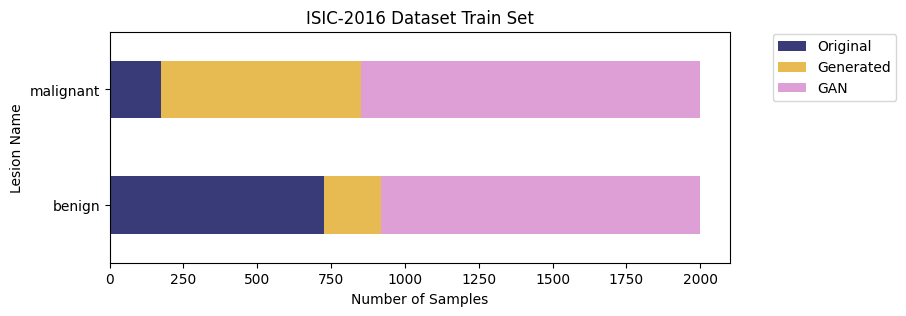

In [8]:
fig = plt.figure(figsize=(8, 3))  # Set the figure size (width, height)

df.plot(x='Lesion',
        kind='barh',
        mark_right=True,
        stacked=True,
        cmap="tab20b",
        title='ISIC-2016 Dataset Train Set',
        ax=fig.gca())  # Use the figure object for the plot

plt.ylabel('Lesion Name')
plt.xlabel('Number of Samples')
plt.legend(loc='upper right', bbox_to_anchor=(1.28, 1.02))
plt.show()


## Create Folders for Oversampling and Filtering

In [9]:
style_dir = os.path.abspath('../../datasets/ISIC-2016/stylegan2-ada')

if os.path.exists(style_dir):
    print("Folders already exist!")
else:
    os.makedirs(style_dir)
    
    networks = os.path.join(style_dir, 'networks/')
    os.makedirs(networks)
    
    oversampling = os.path.join(style_dir, 'oversampling/')
    os.makedirs(oversampling)
    
    targetnames = ['No-Filtering', 'FBGT', 'FAGT']
    classes = ['benign', 'malignant']
    hyperparameters = ['alpha_1', 'alpha_2', 'alpha_3']
    category_1 = ['oversample', 'filtered', 'removed']
    category_2 = ['oversample']
    
    
    for i in targetnames:
        if i == 'No-Filtering':
            for j in classes:
                os.makedirs(networks + i + '/' + j)
                for k in category_2:
                    os.makedirs(oversampling + i + '/' + k + '/' + j)
        elif i == 'FBGT':
            for j in hyperparameters:
                for k in classes:
                    os.makedirs(networks + i + '/' + j + '/' + k)
                    for l in category_1:
                        os.makedirs(oversampling + i + '/' + j + '/' + l + '/' + k)
        elif i == 'FAGT':
            for j in hyperparameters:
                for k in classes:
                    for l in category_1:
                        os.makedirs(oversampling + i + '/' + j + '/' + l + '/' + k)
            
    print("Folders successfully created!")

Folders successfully created!


## Create Folders for GAN and Model Training

In [10]:
dataset_dir = os.path.abspath('../../datasets/ISIC-2016/dataset-processed')

if os.path.exists(dataset_dir):
    print("Folders already exist!")
else:
    os.makedirs(dataset_dir)
    
    targetnames = ['dataset-gan', 'dataset-models']
    for i in targetnames:
        os.makedirs(os.path.join(dataset_dir, i))
            
    print("Folders successfully created!")

Folders successfully created!


## <font color='red'>FBGT Script</font> 

#### <font color='red'>**Warning!</font> Must compute FBGT process first. 

#### **The notebook <font color='RoyalBlue'>ISIC-2016_FBGT</font> contains the code for this process.

## Create Dataset for GAN Training (No-Filtering & FAGT)

In [11]:
src_dir = os.path.abspath('../../datasets/ISIC-2016/image-data-generator')
des_dir = os.path.abspath('../../datasets/ISIC-2016/dataset-processed/dataset-gan')

In [12]:
shutil.make_archive(os.path.join(des_dir, 'isic-2016-gan-no-filtering'), 'zip', src_dir)

'D:\\Research\\Archive\\cossif\\datasets\\ISIC-2016\\dataset-processed\\dataset-gan\\isic-2016-gan-no-filtering.zip'

## Create Dataset for GAN Training (FBGT)

In [13]:
# root directory
root_dir = os.path.abspath('../../datasets/ISIC-2016/')

# creating temp folder
temp_dir = os.path.join(root_dir, 'dataset-processed/dataset-gan/temp')

if os.path.exists(temp_dir):
    shutil.rmtree(temp_dir)
os.makedirs(temp_dir)

classes = ['benign', 'malignant']
hyperparameters = ['alpha_1', 'alpha_2', 'alpha_3']

# creating class folders
for i in hyperparameters:
    for j in classes:
        os.makedirs(os.path.join(temp_dir, i, j))

# approximation of images needed
images_needed = [173, 727]

for hp in hyperparameters:
    for idx, i in enumerate(classes):
        source_path = os.path.abspath('../../datasets/ISIC-2016/stylegan2-ada/oversampling/FBGT')
        source_path = os.path.join(source_path, hp, 'filtered', i)

        save_path = os.path.abspath('../../datasets/ISIC-2016/dataset-processed/dataset-gan/temp')
        save_path = os.path.join(save_path, hp, i)

        generate_images(source_path, save_path, images_needed[idx])
        
# creating zip 
output_dir = os.path.join(root_dir, 'dataset-processed/dataset-gan')
shutil.make_archive(os.path.join(output_dir, 'isic-2016-gan-fbgt'), 'zip', temp_dir)
shutil.rmtree(temp_dir)
print('Done!')

Found 582 images belonging to 1 classes.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 582/582 [00:00<00:00, 2700.11it/s]


Found 139 images belonging to 1 classes.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 139/139 [00:00<00:00, 2484.55it/s]


Found 618 images belonging to 1 classes.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 618/618 [00:00<00:00, 2860.81it/s]


Found 148 images belonging to 1 classes.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 148/148 [00:00<00:00, 2499.07it/s]


Found 655 images belonging to 1 classes.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 655/655 [00:00<00:00, 2588.74it/s]


Found 156 images belonging to 1 classes.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 156/156 [00:00<00:00, 2828.04it/s]


Done!


##  <font color='red'>GAN Script</font>

#### <font color='red'>**Warning!</font> Must complete GAN training first. 

#### **The notebook <font color='RoyalBlue'>ISIC-2016_GAN_train</font> contains the code for this process.

## SyleGAN-2-ADA Repository

In [14]:
path = os.path.abspath('../../repository/StyleGAN2-ADA')

if os.path.exists(path):
    print("Folder already exist!")
else:
    os.makedirs(path)
    print("Folder successfully created!")
    git.Git(path).clone('https://github.com/dvschultz/stylegan2-ada-pytorch')
    print("Repository successfully cloned!")

Folder successfully created!
Repository successfully cloned!


In [15]:
repo = os.path.abspath('../../repository/StyleGAN2-ADA/stylegan2-ada-pytorch')
%cd $repo

D:\Research\Archive\cossif\repository\StyleGAN2-ADA\stylegan2-ada-pytorch


## Oversampling (No-Filtering)

In [16]:
network_path = os.path.abspath('../../../datasets/ISIC-2016/stylegan2-ada/networks/No-Filtering')

benign_network_path = os.path.join(network_path, 'benign/benign-network-snapshot-000400.pkl')
malignant_network_path = os.path.join(network_path, 'malignant/malignant-network-snapshot-000400.pkl')

In [17]:
generate_path = os.path.abspath('../../../datasets/ISIC-2016/stylegan2-ada/oversampling/No-Filtering/oversample')

benign_generate_path = os.path.join(generate_path, 'benign')
malignant_generate_path = os.path.join(generate_path, 'malignant')

In [18]:
print("α = 1.0 | benign: ", benign_GAN)
print("α = 1.0 | malignant: ", malignant_GAN)

α = 1.0 | benign:  1081
α = 1.0 | malignant:  1148


In [19]:
!python generate.py --outdir=$benign_generate_path --network=$benign_network_path --trunc=0.7 --seeds=1-1081

!python generate.py --outdir=$malignant_generate_path --network=$malignant_network_path --trunc=0.7 --seeds=1-1148

Loading networks from "D:\Research\Archive\cossif\datasets\ISIC-2016\stylegan2-ada\networks\No-Filtering\benign/benign-network-snapshot-000400.pkl"...
Generating image for seed 1 (0/1081) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Generating image for seed 2 (1/1081) ...
Generating image for seed 3 (2/1081) ...
Generating image for seed 4 (3/1081) ...
Generating image for seed 5 (4/1081) ...
Generating image for seed 6 (5/1081) ...
Generating image for seed 7 (6/1081) ...
Generating image for seed 8 (7/1081) ...
Generating image for seed 9 (8/1081) ...
Generating image for seed 10 (9/1081) ...
Generating image for seed 11 (10/1081) ...
Generating image for seed 12 (11/1081) ...
Generating image for seed 13 (12/1081) ...
Generating image for seed 14 (13/1081) ...
Generating image for seed 15 (14/1081) ...
Generating image for seed 16 (15/1081) ...
Generating image for seed 17 (16/1081) ...
Generating image for seed 18 (

Loading networks from "D:\Research\Archive\cossif\datasets\ISIC-2016\stylegan2-ada\networks\No-Filtering\malignant/malignant-network-snapshot-000400.pkl"...
Generating image for seed 1 (0/1148) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Generating image for seed 2 (1/1148) ...
Generating image for seed 3 (2/1148) ...
Generating image for seed 4 (3/1148) ...
Generating image for seed 5 (4/1148) ...
Generating image for seed 6 (5/1148) ...
Generating image for seed 7 (6/1148) ...
Generating image for seed 8 (7/1148) ...
Generating image for seed 9 (8/1148) ...
Generating image for seed 10 (9/1148) ...
Generating image for seed 11 (10/1148) ...
Generating image for seed 12 (11/1148) ...
Generating image for seed 13 (12/1148) ...
Generating image for seed 14 (13/1148) ...
Generating image for seed 15 (14/1148) ...
Generating image for seed 16 (15/1148) ...
Generating image for seed 17 (16/1148) ...
Generating image for see

## Oversampling (FAGT)

In [20]:
network_path = os.path.abspath('../../../datasets/ISIC-2016/stylegan2-ada/networks/No-Filtering')

benign_network_path = os.path.join(network_path, 'benign/benign-network-snapshot-000400.pkl')
malignant_network_path = os.path.join(network_path, 'malignant/malignant-network-snapshot-000400.pkl')

### FAGT | α = 0.75 | alpha_1

In [21]:
generate_path = os.path.abspath('../../../datasets/ISIC-2016/stylegan2-ada/oversampling/FAGT/alpha_1/oversample')

benign_generate_path = os.path.join(generate_path, 'benign')
malignant_generate_path = os.path.join(generate_path, 'malignant')

In [22]:
num_of_benign = math.floor((100*benign_GAN)/75)
num_of_malignant = math.floor((100*malignant_GAN)/75)

print("α = 0.75 | akiec: ", num_of_benign)
print("α = 0.75 | bcc: ", num_of_malignant)

α = 0.75 | akiec:  1441
α = 0.75 | bcc:  1530


In [23]:
!python generate.py --outdir=$benign_generate_path --network=$benign_network_path --trunc=0.7 --seeds=1-1441

!python generate.py --outdir=$malignant_generate_path --network=$malignant_network_path --trunc=0.7 --seeds=1-1530

Loading networks from "D:\Research\Archive\cossif\datasets\ISIC-2016\stylegan2-ada\networks\No-Filtering\benign/benign-network-snapshot-000400.pkl"...
Generating image for seed 1 (0/1441) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Generating image for seed 2 (1/1441) ...
Generating image for seed 3 (2/1441) ...
Generating image for seed 4 (3/1441) ...
Generating image for seed 5 (4/1441) ...
Generating image for seed 6 (5/1441) ...
Generating image for seed 7 (6/1441) ...
Generating image for seed 8 (7/1441) ...
Generating image for seed 9 (8/1441) ...
Generating image for seed 10 (9/1441) ...
Generating image for seed 11 (10/1441) ...
Generating image for seed 12 (11/1441) ...
Generating image for seed 13 (12/1441) ...
Generating image for seed 14 (13/1441) ...
Generating image for seed 15 (14/1441) ...
Generating image for seed 16 (15/1441) ...
Generating image for seed 17 (16/1441) ...
Generating image for seed 18 (

Loading networks from "D:\Research\Archive\cossif\datasets\ISIC-2016\stylegan2-ada\networks\No-Filtering\malignant/malignant-network-snapshot-000400.pkl"...
Generating image for seed 1 (0/1530) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Generating image for seed 2 (1/1530) ...
Generating image for seed 3 (2/1530) ...
Generating image for seed 4 (3/1530) ...
Generating image for seed 5 (4/1530) ...
Generating image for seed 6 (5/1530) ...
Generating image for seed 7 (6/1530) ...
Generating image for seed 8 (7/1530) ...
Generating image for seed 9 (8/1530) ...
Generating image for seed 10 (9/1530) ...
Generating image for seed 11 (10/1530) ...
Generating image for seed 12 (11/1530) ...
Generating image for seed 13 (12/1530) ...
Generating image for seed 14 (13/1530) ...
Generating image for seed 15 (14/1530) ...
Generating image for seed 16 (15/1530) ...
Generating image for seed 17 (16/1530) ...
Generating image for see

### FAGT | α = 0.80 | alpha_2

In [24]:
generate_path = os.path.abspath('../../../datasets/ISIC-2016/stylegan2-ada/oversampling/FAGT/alpha_2/oversample')

benign_generate_path = os.path.join(generate_path, 'benign')
malignant_generate_path = os.path.join(generate_path, 'malignant')

In [25]:
num_of_benign = math.floor((100*benign_GAN)/80)
num_of_malignant = math.floor((100*malignant_GAN)/80)

print("α = 0.80 | akiec: ", num_of_benign)
print("α = 0.80 | bcc: ", num_of_malignant)

α = 0.80 | akiec:  1351
α = 0.80 | bcc:  1435


In [26]:
!python generate.py --outdir=$benign_generate_path --network=$benign_network_path --trunc=0.7 --seeds=1-1351

!python generate.py --outdir=$malignant_generate_path --network=$malignant_network_path --trunc=0.7 --seeds=1-1435

Loading networks from "D:\Research\Archive\cossif\datasets\ISIC-2016\stylegan2-ada\networks\No-Filtering\benign/benign-network-snapshot-000400.pkl"...
Generating image for seed 1 (0/1351) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Generating image for seed 2 (1/1351) ...
Generating image for seed 3 (2/1351) ...
Generating image for seed 4 (3/1351) ...
Generating image for seed 5 (4/1351) ...
Generating image for seed 6 (5/1351) ...
Generating image for seed 7 (6/1351) ...
Generating image for seed 8 (7/1351) ...
Generating image for seed 9 (8/1351) ...
Generating image for seed 10 (9/1351) ...
Generating image for seed 11 (10/1351) ...
Generating image for seed 12 (11/1351) ...
Generating image for seed 13 (12/1351) ...
Generating image for seed 14 (13/1351) ...
Generating image for seed 15 (14/1351) ...
Generating image for seed 16 (15/1351) ...
Generating image for seed 17 (16/1351) ...
Generating image for seed 18 (

Loading networks from "D:\Research\Archive\cossif\datasets\ISIC-2016\stylegan2-ada\networks\No-Filtering\malignant/malignant-network-snapshot-000400.pkl"...
Generating image for seed 1 (0/1435) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Generating image for seed 2 (1/1435) ...
Generating image for seed 3 (2/1435) ...
Generating image for seed 4 (3/1435) ...
Generating image for seed 5 (4/1435) ...
Generating image for seed 6 (5/1435) ...
Generating image for seed 7 (6/1435) ...
Generating image for seed 8 (7/1435) ...
Generating image for seed 9 (8/1435) ...
Generating image for seed 10 (9/1435) ...
Generating image for seed 11 (10/1435) ...
Generating image for seed 12 (11/1435) ...
Generating image for seed 13 (12/1435) ...
Generating image for seed 14 (13/1435) ...
Generating image for seed 15 (14/1435) ...
Generating image for seed 16 (15/1435) ...
Generating image for seed 17 (16/1435) ...
Generating image for see

### FAGT | α = 0.85 | alpha_3 

In [27]:
generate_path = os.path.abspath('../../../datasets/ISIC-2016/stylegan2-ada/oversampling/FAGT/alpha_3/oversample')

benign_generate_path = os.path.join(generate_path, 'benign')
malignant_generate_path = os.path.join(generate_path, 'malignant')

In [28]:
num_of_benign = math.floor((100*benign_GAN)/85)
num_of_malignant = math.floor((100*malignant_GAN)/85)

print("α = 0.85| akiec: ", num_of_benign)
print("α = 0.85| bcc: ", num_of_malignant)

α = 0.85| akiec:  1271
α = 0.85| bcc:  1350


In [29]:
!python generate.py --outdir=$benign_generate_path --network=$benign_network_path --trunc=0.7 --seeds=1-1271

!python generate.py --outdir=$malignant_generate_path --network=$malignant_network_path --trunc=0.7 --seeds=1-1350

Loading networks from "D:\Research\Archive\cossif\datasets\ISIC-2016\stylegan2-ada\networks\No-Filtering\benign/benign-network-snapshot-000400.pkl"...
Generating image for seed 1 (0/1271) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Generating image for seed 2 (1/1271) ...
Generating image for seed 3 (2/1271) ...
Generating image for seed 4 (3/1271) ...
Generating image for seed 5 (4/1271) ...
Generating image for seed 6 (5/1271) ...
Generating image for seed 7 (6/1271) ...
Generating image for seed 8 (7/1271) ...
Generating image for seed 9 (8/1271) ...
Generating image for seed 10 (9/1271) ...
Generating image for seed 11 (10/1271) ...
Generating image for seed 12 (11/1271) ...
Generating image for seed 13 (12/1271) ...
Generating image for seed 14 (13/1271) ...
Generating image for seed 15 (14/1271) ...
Generating image for seed 16 (15/1271) ...
Generating image for seed 17 (16/1271) ...
Generating image for seed 18 (

Loading networks from "D:\Research\Archive\cossif\datasets\ISIC-2016\stylegan2-ada\networks\No-Filtering\malignant/malignant-network-snapshot-000400.pkl"...
Generating image for seed 1 (0/1350) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Generating image for seed 2 (1/1350) ...
Generating image for seed 3 (2/1350) ...
Generating image for seed 4 (3/1350) ...
Generating image for seed 5 (4/1350) ...
Generating image for seed 6 (5/1350) ...
Generating image for seed 7 (6/1350) ...
Generating image for seed 8 (7/1350) ...
Generating image for seed 9 (8/1350) ...
Generating image for seed 10 (9/1350) ...
Generating image for seed 11 (10/1350) ...
Generating image for seed 12 (11/1350) ...
Generating image for seed 13 (12/1350) ...
Generating image for seed 14 (13/1350) ...
Generating image for seed 15 (14/1350) ...
Generating image for seed 16 (15/1350) ...
Generating image for seed 17 (16/1350) ...
Generating image for see

## <font color='red'>FAGT Script</font> 

#### <font color='red'>**Warning!</font> Must compute FAGT process first! 

#### **The notebook <font color='RoyalBlue'>ISIC-2016_FAGT</font> contains the code for this process.

## Oversample (FBGT)

In [30]:
print("α = 0.80 | α = 0.85 | α = 0.90 | akiec: ", benign_GAN)
print("α = 0.80 | α = 0.85 | α = 0.90 | bcc: ", malignant_GAN)

α = 0.80 | α = 0.85 | α = 0.90 | akiec:  1081
α = 0.80 | α = 0.85 | α = 0.90 | bcc:  1148


### FBGT | α = 0.80 | alpha_1 

In [31]:
network_path = os.path.abspath('../../../datasets/ISIC-2016/stylegan2-ada/networks/FBGT/alpha_1')

benign_network_path = os.path.join(network_path, 'benign/alpha-1-benign-network-snapshot-000400.pkl')
malignant_network_path = os.path.join(network_path, 'malignant/alpha-1-malignant-network-snapshot-000400.pkl')

In [32]:
generate_path = os.path.abspath('../../../datasets/ISIC-2016/stylegan2-ada/oversampling/FBGT/alpha_1/oversample')

benign_generate_path = os.path.join(generate_path, 'benign')
malignant_generate_path = os.path.join(generate_path, 'malignant')

In [33]:
!python generate.py --outdir=$benign_generate_path --network=$benign_network_path --trunc=0.7 --seeds=1-1081

!python generate.py --outdir=$malignant_generate_path --network=$malignant_network_path --trunc=0.7 --seeds=1-1148

Loading networks from "D:\Research\Archive\cossif\datasets\ISIC-2016\stylegan2-ada\networks\FBGT\alpha_1\benign/alpha-1-benign-network-snapshot-000400.pkl"...
Generating image for seed 1 (0/1081) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Generating image for seed 2 (1/1081) ...
Generating image for seed 3 (2/1081) ...
Generating image for seed 4 (3/1081) ...
Generating image for seed 5 (4/1081) ...
Generating image for seed 6 (5/1081) ...
Generating image for seed 7 (6/1081) ...
Generating image for seed 8 (7/1081) ...
Generating image for seed 9 (8/1081) ...
Generating image for seed 10 (9/1081) ...
Generating image for seed 11 (10/1081) ...
Generating image for seed 12 (11/1081) ...
Generating image for seed 13 (12/1081) ...
Generating image for seed 14 (13/1081) ...
Generating image for seed 15 (14/1081) ...
Generating image for seed 16 (15/1081) ...
Generating image for seed 17 (16/1081) ...
Generating image for s

Loading networks from "D:\Research\Archive\cossif\datasets\ISIC-2016\stylegan2-ada\networks\FBGT\alpha_1\malignant/alpha-1-malignant-network-snapshot-000400.pkl"...
Generating image for seed 1 (0/1148) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Generating image for seed 2 (1/1148) ...
Generating image for seed 3 (2/1148) ...
Generating image for seed 4 (3/1148) ...
Generating image for seed 5 (4/1148) ...
Generating image for seed 6 (5/1148) ...
Generating image for seed 7 (6/1148) ...
Generating image for seed 8 (7/1148) ...
Generating image for seed 9 (8/1148) ...
Generating image for seed 10 (9/1148) ...
Generating image for seed 11 (10/1148) ...
Generating image for seed 12 (11/1148) ...
Generating image for seed 13 (12/1148) ...
Generating image for seed 14 (13/1148) ...
Generating image for seed 15 (14/1148) ...
Generating image for seed 16 (15/1148) ...
Generating image for seed 17 (16/1148) ...
Generating image

### FBGT | α = 0.85 | alpha_2

In [34]:
network_path = os.path.abspath('../../../datasets/ISIC-2016/stylegan2-ada/networks/FBGT/alpha_2')

benign_network_path = os.path.join(network_path, 'benign/alpha-2-benign-network-snapshot-000400.pkl')
malignant_network_path = os.path.join(network_path, 'malignant/alpha-2-malignant-network-snapshot-000400.pkl')

In [35]:
generate_path = os.path.abspath('../../../datasets/ISIC-2016/stylegan2-ada/oversampling/FBGT/alpha_2/oversample')

benign_generate_path = os.path.join(generate_path, 'benign')
malignant_generate_path = os.path.join(generate_path, 'malignant')

In [36]:
!python generate.py --outdir=$benign_generate_path --network=$benign_network_path --trunc=0.7 --seeds=1-1081

!python generate.py --outdir=$malignant_generate_path --network=$malignant_network_path --trunc=0.7 --seeds=1-1148

Loading networks from "D:\Research\Archive\cossif\datasets\ISIC-2016\stylegan2-ada\networks\FBGT\alpha_2\benign/alpha-2-benign-network-snapshot-000400.pkl"...
Generating image for seed 1 (0/1081) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Generating image for seed 2 (1/1081) ...
Generating image for seed 3 (2/1081) ...
Generating image for seed 4 (3/1081) ...
Generating image for seed 5 (4/1081) ...
Generating image for seed 6 (5/1081) ...
Generating image for seed 7 (6/1081) ...
Generating image for seed 8 (7/1081) ...
Generating image for seed 9 (8/1081) ...
Generating image for seed 10 (9/1081) ...
Generating image for seed 11 (10/1081) ...
Generating image for seed 12 (11/1081) ...
Generating image for seed 13 (12/1081) ...
Generating image for seed 14 (13/1081) ...
Generating image for seed 15 (14/1081) ...
Generating image for seed 16 (15/1081) ...
Generating image for seed 17 (16/1081) ...
Generating image for s

Loading networks from "D:\Research\Archive\cossif\datasets\ISIC-2016\stylegan2-ada\networks\FBGT\alpha_2\malignant/alpha-2-malignant-network-snapshot-000400.pkl"...
Generating image for seed 1 (0/1148) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Generating image for seed 2 (1/1148) ...
Generating image for seed 3 (2/1148) ...
Generating image for seed 4 (3/1148) ...
Generating image for seed 5 (4/1148) ...
Generating image for seed 6 (5/1148) ...
Generating image for seed 7 (6/1148) ...
Generating image for seed 8 (7/1148) ...
Generating image for seed 9 (8/1148) ...
Generating image for seed 10 (9/1148) ...
Generating image for seed 11 (10/1148) ...
Generating image for seed 12 (11/1148) ...
Generating image for seed 13 (12/1148) ...
Generating image for seed 14 (13/1148) ...
Generating image for seed 15 (14/1148) ...
Generating image for seed 16 (15/1148) ...
Generating image for seed 17 (16/1148) ...
Generating image

### FBGT| α = 0.90 | alpha_3

In [37]:
network_path = os.path.abspath('../../../datasets/ISIC-2016/stylegan2-ada/networks/FBGT/alpha_3')

benign_network_path = os.path.join(network_path, 'benign/alpha-3-benign-network-snapshot-000400.pkl')
malignant_network_path = os.path.join(network_path, 'malignant/alpha-3-malignant-network-snapshot-000400.pkl')

In [38]:
generate_path = os.path.abspath('../../../datasets/ISIC-2016/stylegan2-ada/oversampling/FBGT/alpha_3/oversample')

benign_generate_path = os.path.join(generate_path, 'benign')
malignant_generate_path = os.path.join(generate_path, 'malignant')

In [39]:
!python generate.py --outdir=$benign_generate_path --network=$benign_network_path --trunc=0.7 --seeds=1-1081

!python generate.py --outdir=$malignant_generate_path --network=$malignant_network_path --trunc=0.7 --seeds=1-1148

Loading networks from "D:\Research\Archive\cossif\datasets\ISIC-2016\stylegan2-ada\networks\FBGT\alpha_3\benign/alpha-3-benign-network-snapshot-000400.pkl"...
Generating image for seed 1 (0/1081) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Generating image for seed 2 (1/1081) ...
Generating image for seed 3 (2/1081) ...
Generating image for seed 4 (3/1081) ...
Generating image for seed 5 (4/1081) ...
Generating image for seed 6 (5/1081) ...
Generating image for seed 7 (6/1081) ...
Generating image for seed 8 (7/1081) ...
Generating image for seed 9 (8/1081) ...
Generating image for seed 10 (9/1081) ...
Generating image for seed 11 (10/1081) ...
Generating image for seed 12 (11/1081) ...
Generating image for seed 13 (12/1081) ...
Generating image for seed 14 (13/1081) ...
Generating image for seed 15 (14/1081) ...
Generating image for seed 16 (15/1081) ...
Generating image for seed 17 (16/1081) ...
Generating image for s

Loading networks from "D:\Research\Archive\cossif\datasets\ISIC-2016\stylegan2-ada\networks\FBGT\alpha_3\malignant/alpha-3-malignant-network-snapshot-000400.pkl"...
Generating image for seed 1 (0/1148) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Generating image for seed 2 (1/1148) ...
Generating image for seed 3 (2/1148) ...
Generating image for seed 4 (3/1148) ...
Generating image for seed 5 (4/1148) ...
Generating image for seed 6 (5/1148) ...
Generating image for seed 7 (6/1148) ...
Generating image for seed 8 (7/1148) ...
Generating image for seed 9 (8/1148) ...
Generating image for seed 10 (9/1148) ...
Generating image for seed 11 (10/1148) ...
Generating image for seed 12 (11/1148) ...
Generating image for seed 13 (12/1148) ...
Generating image for seed 14 (13/1148) ...
Generating image for seed 15 (14/1148) ...
Generating image for seed 16 (15/1148) ...
Generating image for seed 17 (16/1148) ...
Generating image